In [0]:
import json
files = []
for line in open('Sarcasm_Headlines_Dataset.json', 'r'):
    files.append(json.loads(line))

In [0]:
import pandas as pd
df = pd.DataFrame(files)

In [8]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [0]:
#we are only concerned with headline and dataset
X, Y = df['headline'],df['is_sarcastic']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_tain,Y_test = train_test_split(X,Y,train_size = .8)

In [0]:
#import tokenizer from keras
from tensorflow.keras.preprocessing.text import Tokenizer
#import pad_sequence from keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [0]:
#setting vocab size
vocab_size =10000
#Tokenizing words
tokenized = Tokenizer(num_words= vocab_size,oov_token="<oov>")
tokenized.fit_on_texts(X_train.values)

#word index
word_index = tokenized.word_index

#Changing training text to sequence
training_seq = tokenized.texts_to_sequences(X_train.values)

#padding and turncating so all the sequences are of equal size
padded_seq_train = pad_sequences(training_seq,maxlen = 120,truncating= 'post',padding='post')

#Tokenizing and padding test sequences
test_seq = tokenized.texts_to_sequences(X_test.values)

padded_seq_test = pad_sequences(test_seq,maxlen = 120,truncating= 'post',padding='post')

#Using LSTM

In [26]:
#Note when we use LSTM we dont use Global Avg pooling 1D or Flatten()

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),#here we add a return sequences parameter so that its output will match input of 2nd layer 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])



model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 120, 128)          41472     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_11 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 25        
Total params: 244,273
Trainable params: 244,273
Non-trainable params: 0
_________________________________________________________________


In [27]:
num_epochs = 10 
learn = model.fit(x = padded_seq_train,y= Y_tain,epochs=num_epochs,validation_data=(padded_seq_test,Y_test))

Epoch 1/10
668/668 [==============================] - 130s 194ms/step - loss: 0.4098 - accuracy: 0.8007 - val_loss: 0.3493 - val_accuracy: 0.8439
Epoch 2/10
668/668 [==============================] - 129s 192ms/step - loss: 0.2320 - accuracy: 0.9063 - val_loss: 0.3467 - val_accuracy: 0.8562
Epoch 3/10
668/668 [==============================] - 129s 192ms/step - loss: 0.1504 - accuracy: 0.9422 - val_loss: 0.4205 - val_accuracy: 0.8487
Epoch 4/10
668/668 [==============================] - 129s 193ms/step - loss: 0.0909 - accuracy: 0.9673 - val_loss: 0.5019 - val_accuracy: 0.8465
Epoch 5/10
668/668 [==============================] - 129s 193ms/step - loss: 0.0548 - accuracy: 0.9816 - val_loss: 0.6413 - val_accuracy: 0.8311
Epoch 6/10
668/668 [==============================] - 129s 193ms/step - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.6791 - val_accuracy: 0.8347
Epoch 7/10
668/668 [==============================] - 129s 193ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.7503 -

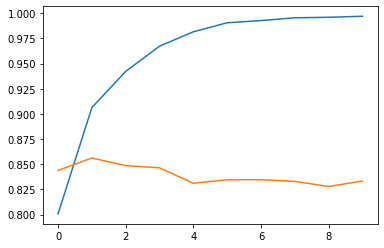

In [38]:
import matplotlib.pyplot as plt


plt.plot(learn.history['accuracy'])
plt.plot(learn.history['val_accuracy'])

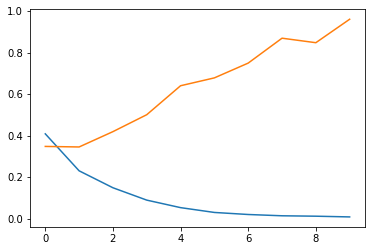

In [39]:
plt.plot(learn.history['loss'])
plt.plot(learn.history['val_loss']);

#Using GRU

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=120),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [46]:
num_epochs = 10 
learn1 = model.fit(x = padded_seq_train,y= Y_tain,epochs=num_epochs,validation_data=(padded_seq_test,Y_test))

Epoch 1/10
668/668 [==============================] - 9s 14ms/step - loss: 0.4292 - accuracy: 0.7902 - val_loss: 0.3616 - val_accuracy: 0.8399
Epoch 2/10
668/668 [==============================] - 9s 14ms/step - loss: 0.2205 - accuracy: 0.9120 - val_loss: 0.3964 - val_accuracy: 0.8345
Epoch 3/10
668/668 [==============================] - 9s 14ms/step - loss: 0.1069 - accuracy: 0.9637 - val_loss: 0.4957 - val_accuracy: 0.8319
Epoch 4/10
668/668 [==============================] - 9s 14ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.6406 - val_accuracy: 0.8317
Epoch 5/10
668/668 [==============================] - 9s 13ms/step - loss: 0.0145 - accuracy: 0.9967 - val_loss: 0.8233 - val_accuracy: 0.8261
Epoch 6/10
668/668 [==============================] - 9s 13ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.8961 - val_accuracy: 0.8340
Epoch 7/10
668/668 [==============================] - 9s 13ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 1.0046 - val_accuracy: 0.8280

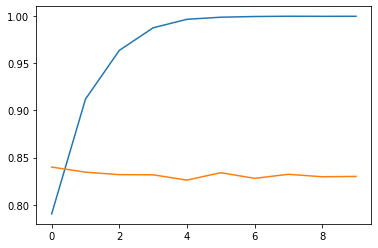

In [47]:
plt.plot(learn1.history['accuracy'])
plt.plot(learn1.history['val_accuracy'])

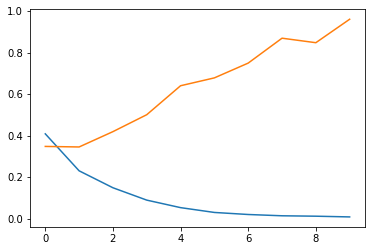

In [48]:
plt.plot(learn.history['loss'])
plt.plot(learn.history['val_loss']);